In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
iris = load_iris()
x=iris.data
y=iris.target

In [4]:
data=np.c_[x,y]

In [5]:
header=['sepal_length','sepal_width','petal_length','petal_width','species']
iris_df=pd.DataFrame(data=data,columns=header)

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris_df.species.replace(0.0,'iris-sesota',inplace=True)
iris_df.species.replace(1.0,'iris-versicolor',inplace=True)
iris_df.species.replace(2.0,'iris-virginica',inplace=True)

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-sesota
1,4.9,3.0,1.4,0.2,iris-sesota
2,4.7,3.2,1.3,0.2,iris-sesota
3,4.6,3.1,1.5,0.2,iris-sesota
4,5.0,3.6,1.4,0.2,iris-sesota


In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
import plotly.graph_objs as go

In [11]:
df1=iris_df.iloc[:50,:]
df2=iris_df.iloc[50:100,:]
df3=iris_df.iloc[100:150,:]

In [12]:
trace1 = go.Scatter(
    #x=x-axis
    x=df1.sepal_length,
    #y=y-axis
    y=df1.sepal_width,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='iris-setosa',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(255, 128, 2, 0.8)'),
    #the hover text
    text=df1.species)
trace2 = go.Scatter(
    x=df2.sepal_length,
    y=df2.sepal_width,
    mode='markers',
    name='iris-versicolor',
    marker=dict(color = 'rgba(0, 255, 200, 0.8)'),
    text=df2.species)
trace3 = go.Scatter(
    x=df3.sepal_length,
    y=df3.sepal_width,
    mode='markers',
    name='iris-virginica',
    marker=dict(color = 'rgba(255, 128, 255, 0.8)'),
    text=df3.species)

In [13]:
data_list=[trace1,trace2,trace3]

In [14]:
layout=dict(title='Sepal length and Sepal Width of Species',
               xaxis=dict(title='Sepal Length',ticklen=5,zeroline=False),
               yaxis=dict(title='Sepal Width',ticklen=5,zeroline=False)
            )

In [15]:
fig=dict(data=data_list,layout=layout)

In [16]:
py.offline.iplot(fig)

In [17]:
df1=iris_df.iloc[:50,:]
df2=iris_df.iloc[50:100,:]
df3=iris_df.iloc[100:150,:]

In [18]:
trace1 = go.Scatter(
    #x=x-axis
    x=df1.petal_length,
    #y=y-axis
    y=df1.petal_width,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='iris-setosa',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(255, 128, 2, 0.8)'),
    #the hover text
    text=df1.species)
trace2 = go.Scatter(
    x=df2.petal_length,
    y=df2.petal_width,
    mode='markers',
    name='iris-versicolor',
    marker=dict(color = 'rgba(0, 255, 200, 0.8)'),
    text=df2.species)
trace3 = go.Scatter(
    x=df3.petal_length,
    y=df3.petal_width,
    mode='markers',
    name='iris-virginica',
    marker=dict(color = 'rgba(255, 128, 255, 0.8)'),
    text=df3.species)

In [19]:
data_list=[trace1,trace2,trace3]

In [20]:
layout=dict(title='Petal length and Petal Width of Species',
               xaxis=dict(title='Petal Length',ticklen=5,zeroline=False),
               yaxis=dict(title='Petal Width',ticklen=5,zeroline=False)
            )

In [21]:
fig=dict(data=data_list,layout=layout)
py.offline.iplot(fig)

In [22]:
class Question:
    #initialise column and value variables->
    #eg->if ques is ->is sepal_length>=1cm then
    #sepal_length==col and 1cm=value
    def __init__(self,column,value):
        self.column=column
        self.value=value
    #it matches wheter the given data is in accordace with the value set or not
    #returns true and false accordingly
    def match(self,data):
        value=data[self.column]
        return value>=self.value
    # This is just a helper method to print
    # the question in a readable format.
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [23]:
#count the unique values of labels and store them in a dictionary
def count_values(rows):
    #will return a dictionary with species values as key and frequency as values
    count={}
    #takes whole dataset in as argument
    for row in  rows:
        #traverse on each datapoint
        label=row[-1]
        #labels are in the last column
        #if label is not even once come initialise it
        if label not in count:
            count[label]=0
        #increase the count of present label by 1
        count[label]+=1
    return count 

In [24]:
#spliting the data based on the respective ques.
def partition(rows,question):
    #intialise two seprate lists 
    true_row,false_row=[],[]
    for row in rows:
        #traverse on each datapoint
        #match the given datapoint with the respective question
        if question.match(row):
            #if question.match returns true aka value is satisfied
            #append the given row in true row list
            true_row.append(row)
        else:
            false_row.append(row)
    return true_row,false_row

In [25]:
def gini(rows):
    #stores dictionary of frequency of labels
    count=count_values(rows)
    #initialise impurity as 1
    impurity=1
    for label in count:
        #probablity of a unique label
        probab_of_label=count[label]/float(len(rows))
        #calculation gini impurity acc to formula
        impurity-=probab_of_label**2
    return impurity

In [26]:
def entropy(rows):
    #initialise entropy
    entropy=0
    from math import log
    #calculating log(x) in base 2
    log2=lambda x:log(x)/log(2)
    count=count_values(rows)
    #storing and traversing the dictionary
    for label in count:
        #probablity of each unique label
        p=count[label]/float(len(rows))
        #calculating entropy
        entropy-=p*log2(p)
    return entropy

In [27]:
def info_gain_gini(current,left,right):
    #porbab of one branch
    p =float(len(left))/len(left)+len(right)
    #formula for info gian
    return current-p*gini(left)-(1-p)*gini(right)

In [28]:
def info_gain_entropy(current,left,right):
    p =float(len(left))/len(left)+len(right)
    return current-p*entropy(left)-(1-p)*entropy(right)

In [29]:
def best_split(rows):
    #initialise best gain and best question
    best_gain=0
    best_question=None
    #calculate the current_gain
    current=gini(rows)
    #total number of features
    features=len(rows[0])-1
    for col in range(features):
        #collects all unique classes for a feature
        values=set([row[col] for row in rows])
        for val in values:
            #traverse each unique classs
            #ask the corresponding question
            question=Question(col,val)
            #devide the data based on that ques
            true_rows,false_rows=partition(rows,question)
            if len(true_rows)==0 or len(false_rows) ==0:
                #no use go to next iteration
                continue
            #calculate corresponding gain
            gain=info_gain_gini(current,true_rows,false_rows)
            #if gain is > than the best replace
            if gain>=best_gain:
                best_gain,best_question=gain,question
            #iterate through each unique class of each feature and return the best gain and best question     
    return best_gain,best_question

In [30]:
class DecisionNode:
    def __init__(self,question,true_branch,false_branch):
        #question object stores col and val variables regarding the question of that node
        self.question = question
        #this stores the branch that is true
        self.true_branch = true_branch
        #this stores the false branch
        self.false_branch = false_branch

In [31]:
class Leaf:
    def __init__(self,rows):
        #stores unique labels and their values in predictio
        self.predictions=count_values(rows)

In [32]:
def build_tree(rows):
    #takes the whole dataset as argument
    #gets the best gain and best question
    gain,question=best_split(rows)
    
    #if gian=0 i.e. leaf conditions are satisfied
    if gain==0:
        #make a leaf object and return
        return Leaf(rows)
    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    #returns the root question node storing branches as well as the quesiton
    return DecisionNode(question, true_branch, false_branch)

In [33]:
tree=build_tree(data)

In [34]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION",node.predictions)
        return 
    #print the question at node
    print(indentation + str(node.question))
    
    #call the function on true branch 
    print(indentation+ "True Branch")
    print_tree(node.true_branch,indentation + " ")
    
    #on flase branch
    print(indentation+ "False Branch")
    print_tree(node.false_branch,indentation + " ")

In [35]:
print_tree(tree)

Is petal_length >= 6.9?
True Branch
 PREDICTION {2.0: 1}
False Branch
 Is sepal_width >= 4.4?
 True Branch
  PREDICTION {0.0: 1}
 False Branch
  Is sepal_width >= 4.2?
  True Branch
   PREDICTION {0.0: 1}
  False Branch
   Is sepal_length >= 7.9?
   True Branch
    PREDICTION {2.0: 1}
   False Branch
    Is sepal_width >= 4.1?
    True Branch
     PREDICTION {0.0: 1}
    False Branch
     Is sepal_width >= 4.0?
     True Branch
      PREDICTION {0.0: 1}
     False Branch
      Is petal_length >= 6.7?
      True Branch
       PREDICTION {2.0: 2}
      False Branch
       Is petal_length >= 6.6?
       True Branch
        PREDICTION {2.0: 1}
       False Branch
        Is petal_length >= 6.3?
        True Branch
         PREDICTION {2.0: 1}
        False Branch
         Is sepal_length >= 7.7?
         True Branch
          PREDICTION {2.0: 1}
         False Branch
          Is sepal_length >= 7.4?
          True Branch
           PREDICTION {2.0: 1}
          False Branch
           Is 

In [37]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [47]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [48]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [49]:
%time model.fit(X, y)

CPU times: user 10.5 s, sys: 30.7 ms, total: 10.5 s
Wall time: 10.5 s


In [50]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [51]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

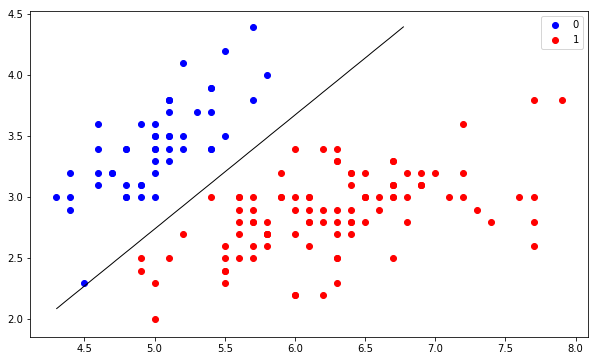

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');